<h3 style="color:red;">Problem Statement</h3>

<h3>Build a prediction model for Salary_hike</h3>

In [1]:
#import necessay library
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter("ignore")

In [2]:
#load the dataset 
df=pd.read_csv('https://raw.githubusercontent.com/AliHumadi2000/LinearRegression_2/main/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA for the dataset

In [3]:
# shape of data
df.shape
#there is 30 observation and 2 features

(30, 2)

In [4]:
#structure of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [5]:
#inforamtion about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
#check form null and dublicated values
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.duplicated().sum()

0

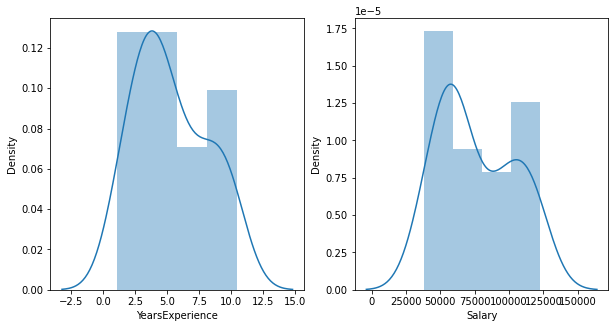

In [8]:
# plot the data if it's follow normal distribution 
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])
plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.show()

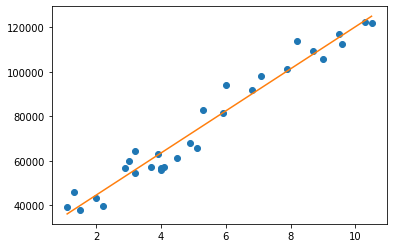

In [9]:
#plot scatter to see the relation between the vars
x=df.YearsExperience
y=df.Salary
plt.plot(x, y, 'o')
#create scatter plot
m, b = np.polyfit(x, y, 1)
#m = slope, b=intercept

plt.plot(x, m*x + b)
plt.show()

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


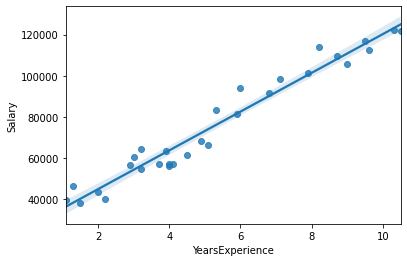

In [11]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])
plt.show()

# build the model  and test

In [12]:
model=smf.ols("Salary~YearsExperience",df).fit()
model

In [13]:
#summary of the model
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.955     
Dependent Variable:   Salary             AIC:                  606.8823  
Date:                 2022-06-05 19:07   BIC:                  609.6847  
No. Observations:     30                 Log-Likelihood:       -301.44   
Df Model:             1                  F-statistic:          622.5     
Df Residuals:         28                 Prob (F-statistic):   1.14e-20  
R-squared:            0.957              Scale:                3.3505e+07
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
Intercept       25792.2002 2273.0534 11.3469 0.0000 21136.0613 30448.3391
YearsExperience  9449.9623  378.7546 24.9501 0.0000  8674.1187 10225.8059
-------------------------------------------------------------------------
Omnibus:                  2.140          Durbin-Watson:             1.648
Prob(Omnibus):            0.343          Jarque-Bera (JB):          1.569
Skew:                     0.363          Prob(JB):                  0.456
Kurtosis:                 2.147          Condition No.:             13   
=========================================================================

"""

In [30]:
#prediction
new_data=pd.Series([5,8,4,6])
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred


,YearsExperience
0,5
1,8
2,4
3,6


In [31]:
model.predict(data_pred)

0     73042.011806
1    101391.898770
2     63592.049484
3     82491.974127
dtype: float64